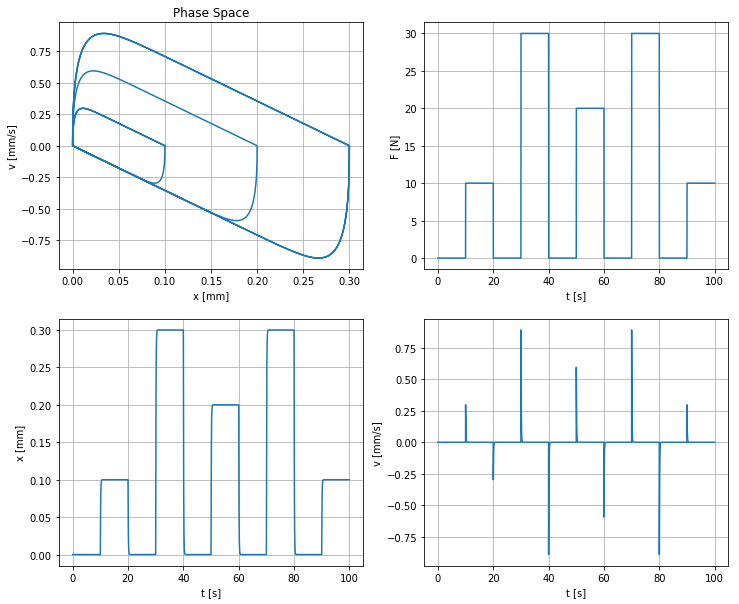

In [3]:
#!/usr/bin/env python
#%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# parameters
#M, D, K = 1.0, 0.2, 1.0
M =     0.5      # [kg]
D = 30000.0*1e-3 # [N/(mm/s)]
K =   100.0      # [N/mm]

# initial settings
x0 = [0.0, 0.0] # x, v
T  = 100.0 # [s]
dt = 0.001 # [s]
#h = [0,10,20,30,40,50,40,30,20,10,0]
h = [0,10,0,30,0,20,0,30,0,10,0] #[N]
w = T/10.0

# equation
def f1(t, F, x, v):  # dx/dt
    return(v)
def f2(t, F, x, v):  # dv/dt
    return((F - D*v - K*x)/M)

vector = [f1, f2]

# input data 'F'
def inF(T, dt, w, h):
    t=t_w=0.0
    i=0
    data=[]
    y=h[i]
    while t<=T:
        if t_w>=w:
            i += 1
            t_w = 0.0
        y = h[i]
        data.append(y)
        t   += dt
        t_w += dt
    return(data)

# 4th runge-kutta
def runge_kutta(x0, T, dt, Fdata, vectorfield):
    width = len(x0)
    x = x0
    t = 0.0
    orbit = []
    info  = []
    cnt = 0
    while t <= T:
        F = Fdata[cnt]
        orbit.append(list(x))
        info.append([t,F])
        x1 = x
        # python3 requests list() as below:
        k1 = list(map(lambda f: f(t, F, *x1), vectorfield))
        x2 = x
        for i in range(width):
            x2[i] += dt / 2.0 * k1[i]
        k2 = list(map(lambda f: f(t + dt / 2.0, F, *x2), vectorfield))
        x3 = x
        for i in range(width):
            x3[i] += dt / 2 * k2[i]
        k3 = list(map(lambda f: f(t + dt / 2.0, F, *x3), vectorfield))
        x4 = x
        for i in range(width):
            x4[i] += dt * k3[i]
        k4 = list(map(lambda f: f(t + dt, F, *x4), vectorfield))
        for i in range(width):
            x[i] += dt / 6.0 * (k1[i] + 2.0 * k2[i] + 2.0 * k3[i] + k4[i])
        if x[0]<=0.0 and x[1]<0.0:
            x = [0.0, 0.0]
        cnt += 1
        t += dt
    return(orbit, info)

# main
F = inF(T, dt, w, h)
(orbit, info) = runge_kutta(x0, T, dt, F, vector)
#print(orbit)

nporbit = np.array(orbit)
ninfo   = np.array(info)
#print(ntime)

# plot
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))

ax1.plot(nporbit[:, 0], nporbit[:, 1])
ax1.set_xlabel('x [mm]')
ax1.set_ylabel('v [mm/s]')
ax1.set_title('Phase Space')
ax1.grid('True')

ax2.plot(ninfo[:, 0], ninfo[:, 1])
ax2.set_xlabel('t [s]')
ax2.set_ylabel('F [N]')
ax2.set_title('')
ax2.grid('True')

ax3.plot(ninfo[:, 0], nporbit[:, 0])
ax3.set_xlabel('t [s]')
ax3.set_ylabel('x [mm]')
ax3.set_title('')
ax3.grid('True')

ax4.plot(ninfo[:, 0], nporbit[:, 1])
ax4.set_xlabel('t [s]')
ax4.set_ylabel('v [mm/s]')
ax4.set_title('')
ax4.grid('True')

plt.show()